# Описание данных
***Данные для первой части***
***Файл /datasets/hypothesis.csv. Скачать датасет**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

***Данные для второй части***
**Файл /datasets/orders.csv. Скачать датасет***
-	transactionId — идентификатор заказа;
-	visitorId — идентификатор пользователя, совершившего заказ;
-	date — дата, когда был совершён заказ;
-	revenue — выручка заказа;
-	group — группа A/B-теста, в которую попал заказ.

***Файл /datasets/visitors.csv. Скачать датасет***
-	date — дата;
-	group — группа A/B-теста;
-	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


# Описание проекта

**Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.**

# Шаг №1 Загрузка библиотек и исходных данных

In [1]:
# импортируем необходимые бибилиотеки

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as stats
import datetime as dt

In [2]:
# загружаем необходимые данные
try:
        hypothesis = pd.read_csv ('hypothesis.csv') #указывается локальный путь
except:
        hypothesis = pd.read_csv ('E:/DA_Yandex/apruv_desizion_in_buziness/hypothesis.csv') #указывается путь на файл в общем доступе
try:
        orders = pd.read_csv ('orders.csv') #указывается локальный путь
except:
        orders = pd.read_csv ('E:/DA_Yandex/apruv_desizion_in_buziness/orders.csv') #указывается путь на файл в общем доступе
try:
        visitors = pd.read_csv ('visitors.csv') #указывается локальный путь
except:
        visitors = pd.read_csv ('E:/DA_Yandex/apruv_desizion_in_buziness/visitors.csv') #указывается путь на файл в общем доступе  


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.2f}'.format

# Шаг №2 Проведем предообработку исходных данных

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis=hypothesis.rename(columns={'Hypothesis':'hypothesis','Reach':'reach','Impact':'impact','Confidence':'confidence','Efforts':'efforts'})

In [6]:
display (hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


- Данные целостные, корректные, типы правильные, дубликатов нет, название полей приведены к стандарту - таблица готова к анализу

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
#Поменяем тип столбца "date" на datetime

orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
display (orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [11]:
orders['date'].describe()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3112\4197849394.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['date'].describe()


count     1197               
unique    31                 
top       2019-08-05 00:00:00
freq      48                 
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [12]:
# Проверим наличие дубликатов

print("Кол-во дубликатов =",orders.duplicated().sum())

Кол-во дубликатов = 0


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
visitors['date'].describe()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3112\511156166.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visitors['date'].describe()


count     62                 
unique    31                 
top       2019-08-01 00:00:00
freq      2                  
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [16]:
display (visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [17]:
print("Кол-во дубликатов =",visitors.duplicated().sum())

Кол-во дубликатов = 0


- Проверим, есть ли пользователи, которые встречаются в обеих группах:

In [18]:
len(np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique()))

58

In [19]:
orders['visitorId'].nunique()

1031

- Общее количество пользователей 1031 в обе Группы попали 58 это 5,6% допустимо но мы их удалим чтобы не было проблем при тестировании

In [20]:
#посмотрим на id тех, кто попал в обе группы:

list_id = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), 
                         orders.query('group == "B"')['visitorId'].unique())
list_id

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

In [21]:
#переведем массив в список:
list_id = list_id.tolist()

In [22]:
orders = orders[~orders.visitorId.isin(list_id)]

In [23]:
#снова проверим, есть ли значения, которые встречаются в обеих группах:
len(np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique()))

0

- Очистили данные от значений, повторяющихся в обеих группах.

# ВЫВОД:

***Проведена предобработка 3 таблиц. Таблицы полностью корректны, целостны, дубликатов нет. Диапазон дат - август 2019 г. в таблицах заказов и посетителей совпадают. В процессе предобработки был изменен тип столбца "date" на datetime. А также выявлены и удалены пользователи попавшие одноврменно в две группы. Всё готово к анализу.***

# Шаг № 3. Приоритизация гипотез.

***В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.***

***Задача***

-	Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
-	Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
-	Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [24]:
#Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False)


,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [25]:
#Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета
hypothesis['RICE'] = (hypothesis['impact']*hypothesis['reach'] * hypothesis['confidence'])/ hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


***Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло***

***Результаты приоритизации ICE и RICE отличаются друг от друга.***

- В таблице ICE гипотезы 8, 0, 7 занимали первые три места, то в RICE первые три места занимают гипотезы 7, 2, 0.
- В таблицы RICE 8-ая гипотеза сместилась с 1-ой на пятую позицыю, 2 перешшла на второе место с пятого, 0 сместилась со 2-го на третье место. 
- Отличие произошло, по видимому, потому что фрмула расчета в фреймворке ICE не учитывает параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести)

# Шаг №4. Анализ A/B-теста

***Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.***

***Задача***

**Проанализируйте A/B-тест:**

- 2.1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- 2.2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- 2.3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- 2.4.	Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- 2.5.	Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- 2.6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- 2.7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- 2.8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- 2.9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- 2.10.	Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- 2.11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- 2.12.	Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- 2.13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- 2.14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


***2.1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения***

In [26]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [27]:
# Рассчитаем усредненную (медианную) выручку за день в каждой группе, чтобы иметь представление сколько выручка за день
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A   92,365.00 
B   107,340.00
Name: revenue, dtype: float64

**Сравним идентичны ли даты и группы в таблицах посетителей и заказов,чтобы без проблем производить объединение данных**

In [28]:
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [29]:
compare_dg = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
display (compare_dg)

,date,group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
57,True,True
58,True,True
59,True,True
60,True,True


**Все пары дата-группа в таблицах посетители и заказы совпадают, можно объединять без проблем**

***Создадим таблицу cumulativeData куммулятивных данных по обеим таблицам orders и visitors***

In [55]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [31]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

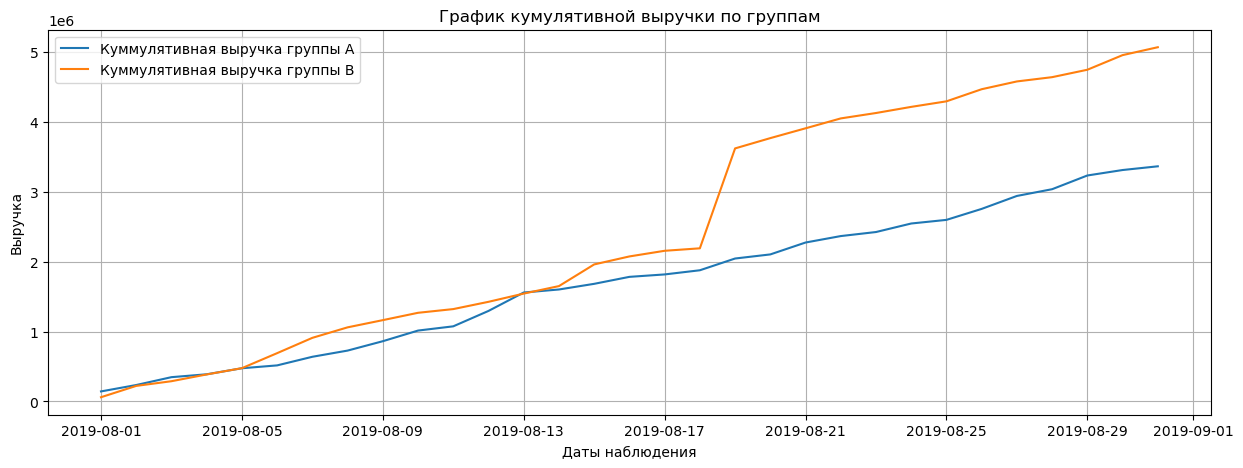

In [32]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xlabel("Даты наблюдения")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Куммулятивная выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Куммулятивная выручка группы B')
plt.grid()
plt.legend();

In [33]:
cumulativeRevenueB.query(' "2019-08-17" <= date <= "2019-08-21" ')

,date,revenue,orders
33,2019-08-17,2155542,320
35,2019-08-18,2190865,327
37,2019-08-19,3620785,348
39,2019-08-20,3768059,368
41,2019-08-21,3908406,380


In [34]:
#print('Суммарная выручка за 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].sum())
print('Медианное значение одного заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(8)

Медианное значение одного заказа 19 августа = 2578.0


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A
463,4170537404,290022471,2019-08-19,16480,B


***ВЫВОД***

***По графиками видно. что  в течении Августа общая тенденция выручки групп А и В  - рост, у группы В рост выше. 13 Августа рост совпал d обеих группах. В период между 17 и 21 Августа был резкий рост выручки в группе В. Это произошло за счет заказа №425 в 1,3 млн. руб. который в 492 раза больше медианного заказа за этот день и можно этот заказ рассматривать как выброс, остальные заказы в этот день не выше 43 тыс.руб.***

***2.2	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения***

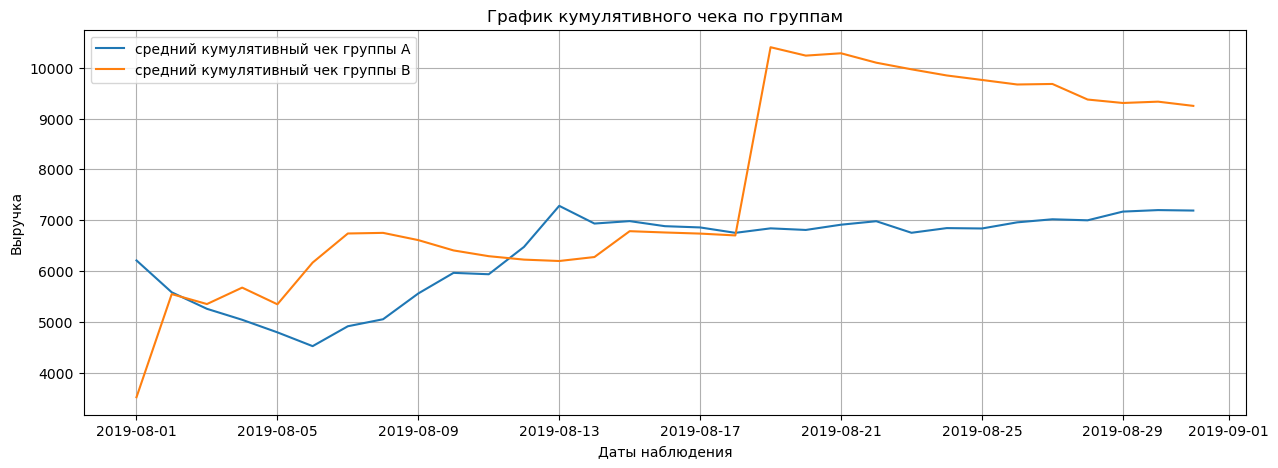

In [56]:
# Чтобы построить графики среднего кумулятивного чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

plt.figure(figsize=(15,5))
plt.title('График кумулятивного чека по группам')
plt.ylabel("Выручка")
plt.xlabel("Даты наблюдения")
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.legend() ;

***ВЫВОД***

***График среднего чека аналогичен графику средней выручки. В начале месяца чек группы В стабильно выше, но 13 числа выше чек в группе А. Всплеск среднего чека 19 августа вызван аномально большим заказом №425 в этот день. После этого чек группы В уменьшается, а в группе А наблюдается небольшая динамика роста.***

***2.3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения***

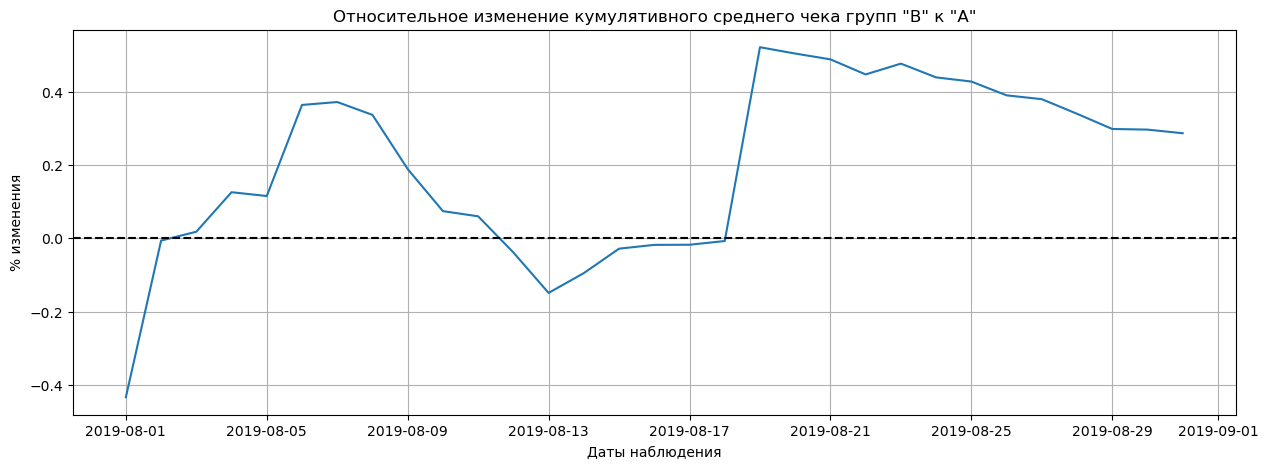

In [57]:
#Cобирем данные в одном датафрейме и потом построим график относительного изменения кумулятивного среднего чека групп

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.ylabel("% изменения")
plt.xlabel("Даты наблюдения")
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.axhline(y=0, color='black', linestyle='--') ;

***ВЫВОД***

***Поскольку этот график является производным от графика п.2.2 то и выводы похожи. Средний чек Группы B рос с 1 августа, 2 августа уже превысил чек Групы A и рос до 7 августа. 7-8 пошло обратное движение до 13 августа. С 13 чек Группы B опять начал расти и уже 15-16 августа наступил переломный момент и чек Группы B оказался больше и находился больше чека Группы A до конца месяца. Опять же здесь хорошо видно, что 19 августа был сильный всплеск (рост) за счет заказа №425 с аномально большим объемом, а в последующие дни средний чек Группы B также постепенно снижался.***

***2.4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения***

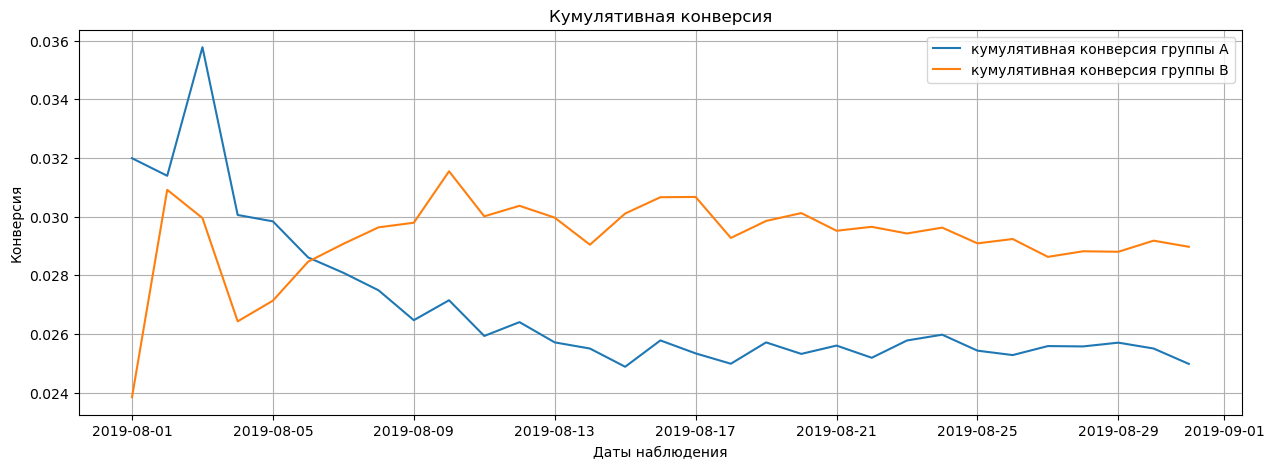

In [58]:
# Проанализируем график куммулятивной конверсии

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.ylabel("Конверсия")
plt.xlabel("Даты наблюдения")
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивная конверсия группы A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивная конверсия группы B')
plt.title('Кумулятивная конверсия')
plt.legend();

***ВЫВОД***

***С начала месяца 1-5 августа конверсия группы A была больше группы В, 3 августа она была максимальной за весь период наблюдения между группами, после пика она пошла сильно вниз и 9 агуста достигла уровня чуть выше 0,026, а начиная с 13 августа колебалась в диапазоне 0,024-0,026. 
Конверсия группы B с 4 августа начала расти и уже 6 августа превысила конверсию группы A и росла до 9 августа чуть ниже 0,032, между 9 и 18 Августа были колебания 0,027 до 0,032 затем пошло постепенное снижение до диапазона 0,030-0,028. 
Можно сделать вывод - начиная с 6 августа конверсия группы B больше чем группы A.***

***2.5.Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.***

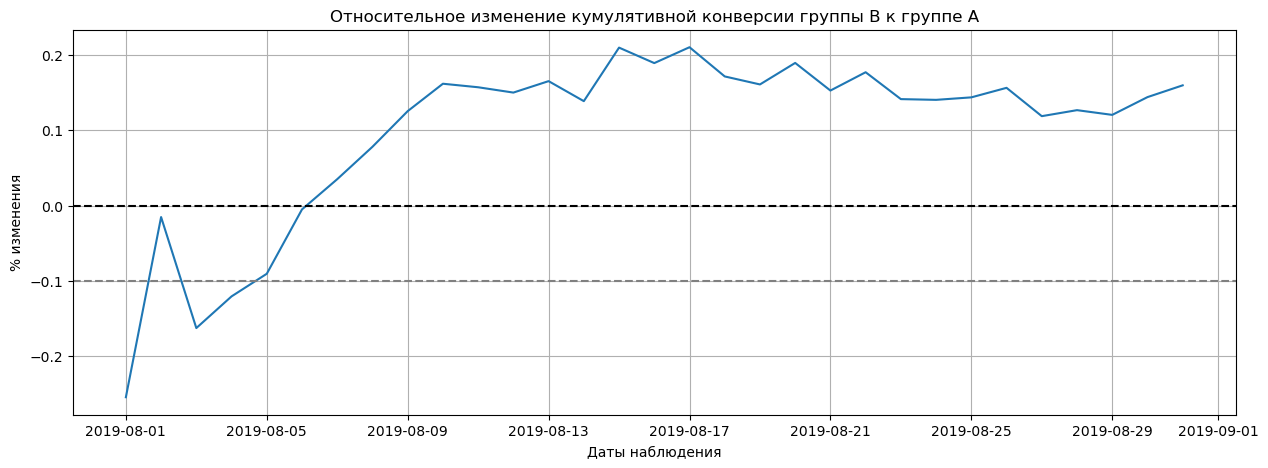

In [59]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.ylabel("% изменения")
plt.xlabel("Даты наблюдения")
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=-0.1, color='grey', linestyle='--');
#plt.axhline(y=0.21, color='grey', linestyle='--')
#plt.axhline(y=0.057, color='grey', linestyle='--');
 

***ВЫВОД***

***С 1 по 5 Августа - несколько дней когда конверсия группы A была больше на 5-10% конверсии группы В, но в целом 
конверсия группы В показывает себя намного лучше начиная с 5-го Августа, достигая прироста в течении месяца до чуть более 20% относительно конверсии группы А.***

***2.6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.***

In [60]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B


In [61]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


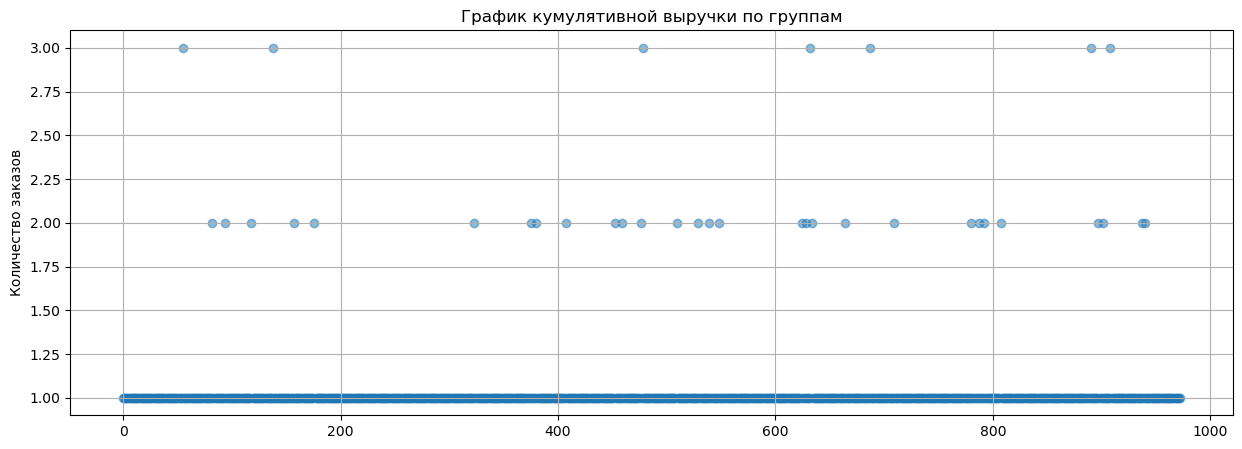

In [62]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Количество заказов")
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

***ВЫВОД***

***Больше всего пользователей которые совершили 1 заказ. Тех кто совершили 2 заказа уже не так много. И уже те кто совершил 3 заказа совсем мало, и считать ли это выбросами пока не ясно, - надо посчитать процентили (95 и 99). А все что выше 3 заказов - явно уже аномалия.***

***2.7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.***

In [63]:
print('Рассчитаем 95 и 99 перцентили по заказам : ', np.percentile(ordersByUsers['orders'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по заказам :  [1. 2.]


***ВЫВОД***

***Большинство пользователей совершают один максимум 2 заказа все что больше это аномалия.***

***2.8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.***

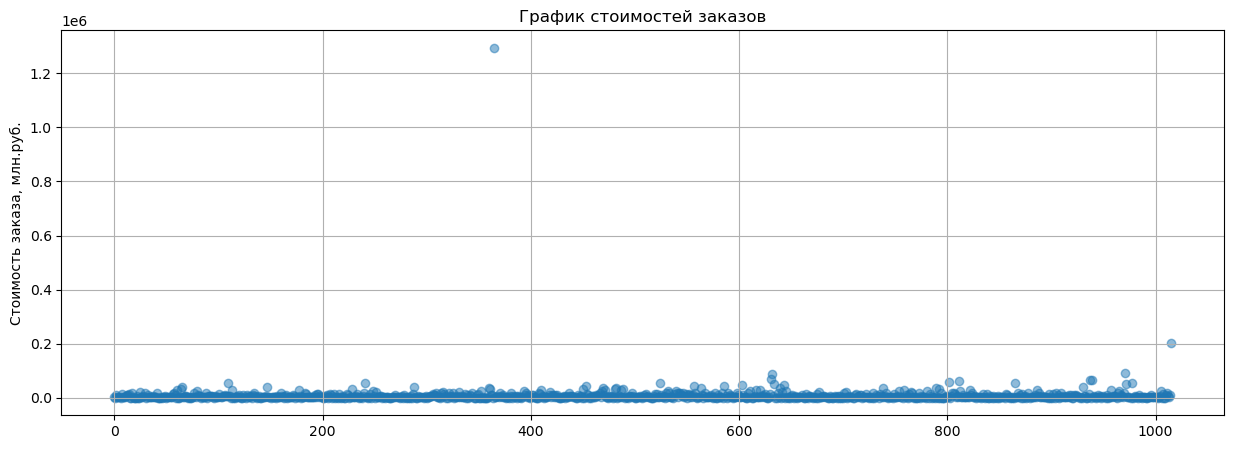

In [64]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.ylabel("Стоимость заказа, млн.руб.")
plt.scatter(x_values, orders['revenue'], alpha=0.5);

***ВЫВОД***

***Хорошо видно самый аномальный заказ №425 на 1.3 млн и еще один на ~200 тысяц, остальные примерно не больше 100 тысяч. Чтобы найти более точную границу аномальных заказов рассчитаем процентили***

***2.9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.***

In [44]:
print('Рассчитаем 95 и 99 перцентили по выручке заказов : ', np.percentile(orders['revenue'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по выручке заказов :  [26785. 53904.]


***ВЫВОД***

***99% заказов по стоимости меньше 53904 установим ее в качестве границы аномалий***

***2.10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.***

- Соберем все данные по заказам и визитам а также добавим кумулятивные показатели в одну таблицу. Для этого создадим несколько таблиц а затем объединим их

In [65]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [66]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [69]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

- Теперь соеденим все в одну таблицу

In [70]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


- Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
- В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().

- Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (критический уровень статистической значимости возьмём равным 5% (0.05)).

***Н0 - "Статистически значимых различий в конверсии между группами нет"***

***Н1 - "Статистически значимые различия есть."***

In [71]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'группы B' и 'группы A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.011
Относительный показатель 'группы B' и 'группы A' = 0.160


***ВЫВОД***

***p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы B над A равен 16%***

***2.11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
Сделайте выводы и предположения***

- Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() (U-тест Манна-Уитни) данные о выручке с заказов  (критический уровень статистической значимости возьмём равным 5% (0.05)). И найдём относительные различия в среднем чеке между группами.

***Н0 - "Статистически значимых различий в средних чеках между группами нет"***

***Н1 - "Статистически значимые различия есть"***

In [72]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.829
Относительный показатель 'B' и 'A' = 0.287


***ВЫВОД***

***P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи, наблюдаемое различите в 28,7% не является статистически значимым и не служит осннованием для того, чтобы отвергнуть нулевую гипотезу.***

***2.12.Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения***

- Вспомним - из предыдущих пунктов мы приняли за аномальных пользователей тех, кто совершил 3 и больше заказов или совершил заказ дороже 53904 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53904 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers

In [75]:
revenue_lim = np.percentile(orders['revenue'], 99)
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print ('число аномальных пользователей:', len(abnormalUsers))

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
число аномальных пользователей: 16


- Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по "очищенным" данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [76]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0)

***Применим статистический критерий Манна-Уитни к полученным выборкам***

***H0 - "Cтатистически значимых различий в конверсии между группами нет"***

***H1"статистически значимые различия есть"***

- Критический уровень статистической значимости возьмём равным alpha = 5% (0.05)

In [77]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'Группа B' и 'Группа A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.007
Относительный показатель 'Группа B' и 'Группа A' = 0.189


***ВЫВОД***

***p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит что по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш Группы B над Группой A равен 18,9% и он выше, чем с «сырыми» данными - 16%***

***2.13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения***

***Теперь посмотрим произошло ли что-нибудь с результатами по среднему чеку?***

***H0 - "статистически значимых различий в средних чеках между группами нет"***

***H1 - "статистически значимые различия есть"***

- Критический уровень статистической значимости возьмём равным alpha = 5% (0.05)

In [78]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'Группа B' и 'Группа A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

alpha = 0.05
p-value = 0.788
Относительный показатель 'Группа B' и 'Группа A' = -0.032


***ВЫВОД***

***P-value  больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия - нет (как и по "Сырым" данными). А вот средний чек группы B по "очищенным" данным оказался незначительно (на 3,2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше на ~28,7%, - и всё это из-за одного того самого аномального заказа №425 на 1,3 млн***

***2.14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.***

***ВЫВОД***

***По результатам тестирования было выявлено:***

- И по "сырым" и по "очищенным" данным различия в конверсии групп A и B есть. Относительный выигрыш Группы B над Группой A равен 18% по "очищенным" и 16.9% по "сырым" данным.

- Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках Групп A и B отстутствуют, несмотря на то, что средний чек Группы B оказался незначительно (на 3,2%) ниже среднего чека Группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше на ~28,7%, - и всё это из-за одного того самого аномального заказа №425 на 1,3 млн ! Всё логично, аномальный заказ убрали и чеки сравнялись.

***Результаты тестирования вполне однозначны.***

- В итоге можно принять решение остановить тестирование и констатировать успех и победу Группы B : Группа B значительно лучше, эффективнее, Группы A по конверсии, хотя по среднему чеку Группы примерно равны.